<a href="https://colab.research.google.com/github/aphipps923/IMSE541/blob/main/Lab4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Lab4data2.csv to Lab4data2.csv
User uploaded file "Lab4data2.csv" with length 498 bytes


In [ ]:
data = pd.read_csv("Lab4data2.csv", sep=',', na_values=".")

data

,a,b,c,d,score
0,-1,-1,-1,-1,188
1,-1,-1,-1,-1,195
2,1,-1,-1,-1,172
3,1,-1,-1,-1,180
4,-1,1,-1,-1,179
5,-1,1,-1,-1,187
6,1,1,-1,-1,185
7,1,1,-1,-1,178
8,-1,-1,1,-1,175
9,-1,-1,1,-1,180


In [ ]:
df = data

In [ ]:
model = ols('score ~ C(a) + C(b) + C(a):C(b) + C(c) + C(a):C(c) + C(b):C(c) + C(a):C(b):C(c) + C(d) + C(a):C(d) + C(b):C(d) + C(a):C(b):C(d) + C(c):C(d) + C(a):C(c):C(d) + C(b):C(c):C(d) + C(a):C(b):C(c):C(d)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),657.03125,1.0,22.729730,0.000210
C(b),13.78125,1.0,0.476757,0.499790
C(c),57.78125,1.0,1.998919,0.176574
C(d),124.03125,1.0,4.290811,0.054847
C(a):C(b),132.03125,1.0,4.567568,0.048369
C(a):C(c),3.78125,1.0,0.130811,0.722325
C(b):C(c),2.53125,1.0,0.087568,0.771099
C(a):C(d),38.28125,1.0,1.324324,0.266726
C(b):C(d),0.28125,1.0,0.009730,0.922650
C(c):C(d),22.78125,1.0,0.788108,0.387824


In [ ]:
aa=df[['a']].to_numpy()
bb=df[['b']].to_numpy()
cc=df[['c']].to_numpy()
dd=df[['d']].to_numpy()
ab=aa*bb
ac=aa*cc
bc=bb*cc
ad=aa*dd
bd=bb*dd
cd=cc*dd
abc=aa*bb*cc
abd=aa*bb*dd
acd=aa*cc*dd
bcd=bb*cc*dd
abcd=aa*bb*cc*dd

In [ ]:
df['ab']=ab
df['ac']=ac
df['bc']=bc
df['ad']=ad
df['bd']=bd
df['cd']=cd
df['abc']=abc
df['abd']=abd
df['acd']=acd
df['bcd']=bcd
df['abcd']=abcd

In [ ]:
X=df[['a', 'b', 'ab', 'c' , 'ac' , 'bc' , 'abc' , 'd' , 'ad' , 'bd' , 'cd' , 'abd' , 'acd' , 'bcd' , 'abcd']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,ab,c,ac,bc,abc,d,ad,bd,cd,abd,acd,bcd,abcd
0,1.0,-1,-1,1,-1,1,1,-1,-1,1,1,1,-1,-1,-1,1
1,1.0,-1,-1,1,-1,1,1,-1,-1,1,1,1,-1,-1,-1,1
2,1.0,1,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1,-1,-1
3,1.0,1,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1,-1,-1
4,1.0,-1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1
5,1.0,-1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,1,-1
6,1.0,1,1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,1
7,1.0,1,1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,1
8,1.0,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1,1,-1
9,1.0,-1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,1,1,-1


In [ ]:
model = sm.OLS(df['score'], X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3.471
Date:                Mon, 03 Oct 2022   Prob (F-statistic):            0.00917
Time:                        02:01:29   Log-Likelihood:                -88.141
No. Observations:                  32   AIC:                             208.3
Df Residuals:                      16   BIC:                             231.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        182.7813      0.950    192.314      0.0

In [ ]:
res.resid

0    -3.5
1     3.5
2    -4.0
3     4.0
4    -4.0
5     4.0
6     3.5
7    -3.5
8    -2.5
9     2.5
10    2.5
11   -2.5
12    5.0
13   -5.0
14    3.5
15   -3.5
16    3.5
17   -3.5
18   -4.0
19    4.0
20    4.0
21   -4.0
22   -2.5
23    2.5
24    6.5
25   -6.5
26    4.0
27   -4.0
28    3.5
29   -3.5
30   -2.0
31    2.0
dtype: float64

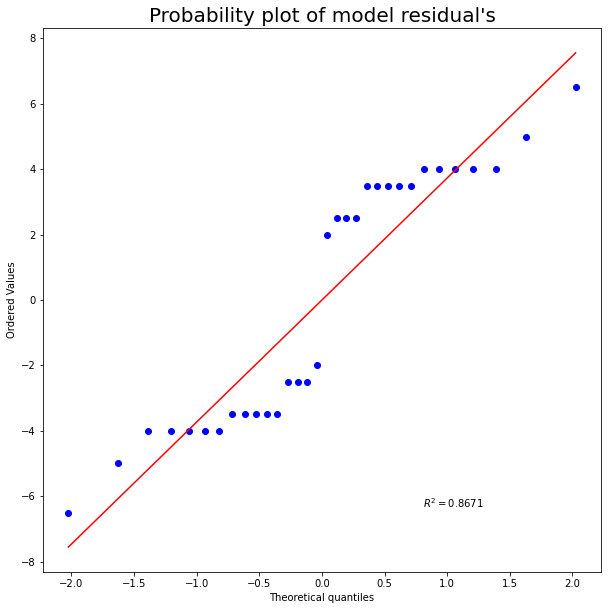

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [ ]:
# Homogeneity of Variance check
# if the p value is small, reject H0 that the residuals have equal variance
# if the p value is large, cannot reject H0

stats.levene(df['score'][df['a'] == -1],
             df['score'][df['a'] == 1])

LeveneResult(statistic=1.1971651130123866, pvalue=0.28259662247690953)

In [ ]:
stats.levene(df['score'][df['b'] == -1],
             df['score'][df['b'] == 1])

LeveneResult(statistic=2.9648909491602704, pvalue=0.09538757217506133)

In [ ]:
stats.levene(df['score'][df['c'] == -1],
             df['score'][df['c'] == 1])

LeveneResult(statistic=0.28015273512077693, pvalue=0.6004962132959313)

In [ ]:
stats.levene(df['score'][df['d'] == -1],
             df['score'][df['d'] == 1])

LeveneResult(statistic=0.6182313985196728, pvalue=0.4378722761387256)

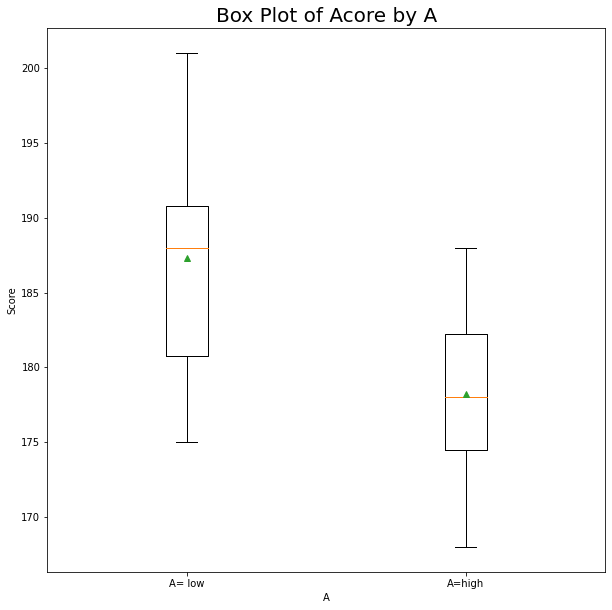

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Acore by A", fontsize= 20)
ax.set

data2 = [df['score'][df['a'] == -1],
             df['score'][df['a'] == 1]]


ax.boxplot(data2,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A")
plt.ylabel("Score")

plt.show()